In [5]:
#### 모델 로드 하기 ###
import cv2, torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import models
import numpy as np

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])

In [7]:
class suffle(nn.Module) :
    def __init__(self, output) :
        super().__init__()
        self.model = models.shufflenet_v2_x0_5(pretrained=True)
        self.model.fc = torch.nn.Linear(1024, output) #change the last FC layer
        
    def forward(self, x) :
        output = self.model(x)
        return output

In [10]:
# 전체 모델 가져옴
model = torch.load('C:\data\\finger\ShuffleNet_total_model.pt', map_location=torch.device('cpu')) 
model.eval() # 평가 모드?

suffle(
  (model): ShuffleNetV2(
    (conv1): Sequential(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (stage2): Sequential(
      (0): InvertedResidual(
        (branch1): Sequential(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
          (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
        )
        (branch2): Sequential(
          (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(5

In [22]:
# 가중치만 가져옴
#model = suffle(6) # 6개의 class
#model.load_state_dict(torch.load('C:\data\ShuffleNet_model.pt', map_location=torch.device('cpu'))) # 저장해논 path에서 가중치 불러옴
#model.eval() # 평가 모드?

In [11]:
print(model.state_dict()) # 가중치 확인

OrderedDict([('model.conv1.0.weight', tensor([[[[ 6.4983e-01,  1.6502e-01, -2.3759e-01],
          [-3.6351e-03, -1.4538e+00, -6.2642e-02],
          [-3.2705e-01,  1.6821e-01,  8.3115e-01]],

         [[ 1.3519e+00,  1.9105e-01, -4.7820e-01],
          [-9.8226e-02, -2.1762e+00, -2.5210e-01],
          [-4.9536e-01,  8.5020e-02,  1.4180e+00]],

         [[ 3.4901e-01,  1.9460e-01, -1.7255e-01],
          [ 1.0640e-01, -8.4060e-01, -9.3606e-04],
          [-2.1666e-01,  9.8362e-02,  3.2419e-01]]],


        [[[ 6.6036e-01,  9.3334e-01,  7.1874e-01],
          [ 1.2012e-01,  1.5776e-01,  1.0248e-01],
          [-8.1260e-01, -1.1589e+00, -8.9699e-01]],

         [[ 1.1183e+00,  1.5263e+00,  1.1843e+00],
          [ 1.4392e-01,  1.3760e-01,  7.6870e-02],
          [-1.2249e+00, -1.7141e+00, -1.3056e+00]],

         [[ 2.0712e-01,  4.5050e-01,  2.2876e-01],
          [ 6.2157e-02,  1.2960e-01,  6.1578e-02],
          [-3.0729e-01, -5.9364e-01, -3.5188e-01]]],


        [[[ 1.4577e-01,  8.0

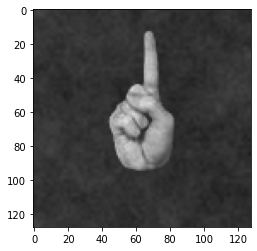

In [13]:
### 모델 테스트 ###
import PIL.Image as pilimg
import matplotlib.pyplot as plt

path = 'C:\data\\finger\\img111.png' # 사진 경로
image = cv2.imread(path) # 기존 fingers 사진일 경우 cv2.imread(path)를 하면 색갈이 제대로 나옴
plt.imshow(image)

In [14]:
image = transform(image)
image

tensor([[[0.2314, 0.2343, 0.2402,  ..., 0.1696, 0.1637, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1689, 0.1635, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1674, 0.1630, 0.1608],
         ...,
         [0.2451, 0.2473, 0.2517,  ..., 0.1833, 0.1814, 0.1804],
         [0.2412, 0.2439, 0.2493,  ..., 0.1833, 0.1814, 0.1804],
         [0.2392, 0.2422, 0.2480,  ..., 0.1833, 0.1814, 0.1804]],

        [[0.2314, 0.2343, 0.2402,  ..., 0.1696, 0.1637, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1689, 0.1635, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1674, 0.1630, 0.1608],
         ...,
         [0.2451, 0.2473, 0.2517,  ..., 0.1833, 0.1814, 0.1804],
         [0.2412, 0.2439, 0.2493,  ..., 0.1833, 0.1814, 0.1804],
         [0.2392, 0.2422, 0.2480,  ..., 0.1833, 0.1814, 0.1804]],

        [[0.2314, 0.2343, 0.2402,  ..., 0.1696, 0.1637, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1689, 0.1635, 0.1608],
         [0.2314, 0.2343, 0.2402,  ..., 0.1674, 0.1630, 0.

In [15]:
image.shape

torch.Size([3, 256, 256])

In [16]:
image = image.unsqueeze(0) # 0번째에 차원을 하나 늘려줌
image.shape

torch.Size([1, 3, 256, 256])

In [17]:
pred = nn.functional.softmax(model(image), dim=1)
torch.set_printoptions(sci_mode=False)

pred

tensor([[    0.0000,     1.0000,     0.0000,     0.0000,     0.0000,     0.0000]],
       grad_fn=<SoftmaxBackward0>)

In [18]:
pred = pred.detach().numpy()
top_1 = np.argmax(pred, axis=1)
score = np.amax(pred, axis=1)
print(top_1, score)

[1] [0.999992]


In [16]:
##### webcam test ##### 
import cv2 
cap = cv2.VideoCapture(0) 
cap.set(3, 720) 
cap.set(4, 1080) 


while True: 
    ret, frame = cap.read()
    frame = cv2.flip(frame,1) # 좌우반전
    cv2.imshow('test', frame) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # 해당 창을 클릭 후 q 누르면 종료(안되면 영문 바꿔서? 그래도 안되면 컨트롤알트딜리트..)
        break
        
cap.release() 
cv2.destroyAllWindows()

In [19]:
### webcam을 이용한 실시간 예측 ###
import PIL 
import cv2
import torchvision 

In [20]:
def preprocess(image): # 예측전 이미지 전처리
    image = PIL.Image.fromarray(image) #Webcam frames are numpy array format
                                       #Therefore transform back to PIL image
    #print(image)                             
    image = transform(image)
    image = image.float()
    #image = image.cpu() # 원래 코드 : image = image.cuda() (gpu가 없기 떄문에)
    image = image.unsqueeze(0) # 3d -> 4d
    return image                            #dimension out of our 3-D vector Tensor

In [24]:
cap = cv2.VideoCapture(0) #Set the webcam
cap.set(3,900)
cap.set(4,600)

fps = 0

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

while True:
    ret, frame = cap.read() #Capture each frame
    frame = cv2.flip(frame,1)
    
    if fps == 4:
        image   = frame[150:400, 300:600] # [높이범위, 폭범위] -> 밑에 rectangular 범위와 맞춰줘야함
        image   = preprocess(image)
        prediction   = model(image)
        fps = 0
        
        pred = nn.functional.softmax(prediction, dim=1)
        
    fps += 1
    cv2.putText(frame, '0 = %.3f' %(pred[0][0]),(700,250), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(frame, '1 = %.3f' %(pred[0][1]),(700,230), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(frame, '2 = %.3f' %(pred[0][2]),(700,210), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(frame, '3 = %.3f' %(pred[0][3]),(700,190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(frame, '4 = %.3f' %(pred[0][4]),(700,170), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(frame, '5 = %.3f' %(pred[0][5]),(700,150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.rectangle(frame,(300,150),(600,400), (0,0,250), 2) # 박스 치는 코드 (완쪽 아래 꼭짓점, 오른쪽 위 꼭짓점, (B,G,R), 두께)
    cv2.imshow("finger detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()